In [1]:
import numpy as np
import pandas as pd
import scipy
import imageio
import math
import phylo as ph

from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
import warnings
sns.set(style="ticks")
plt.style.use("seaborn-whitegrid")

In [2]:
%load_ext blackcellmagic

# Preparation

All the expensive setup happens up here.

In [3]:
np.random.seed(820)
REGULAR_POKEMON = ph.vectorize_pokemon(ph.REGULAR_POKEMON_PATH)
SHINY_POKEMON = ph.vectorize_pokemon(ph.SHINY_POKEMON_PATH)

Vectorizing pokemon from /Users/vineshkannan/Documents/GitHub/phylo/images/regular/
Vector iteration 0
Vector iteration 100
Vector iteration 200
Vector iteration 300
Vector iteration 400
Vector iteration 500
Vector iteration 600
Done vectorizing
Vectorizing pokemon from /Users/vineshkannan/Documents/GitHub/phylo/images/shiny/
Vector iteration 0
Vector iteration 100
Vector iteration 200
Vector iteration 300
Vector iteration 400
Vector iteration 500
Vector iteration 600
Done vectorizing


In [4]:
known_creatures = list(REGULAR_POKEMON) + list(SHINY_POKEMON)
np.random.shuffle(known_creatures)

In [5]:
random_vectors = [ph.generate_random() for i in range(len(known_creatures))]
expect_base_pop = known_creatures + random_vectors
len(expect_base_pop)

2596

In [24]:
n_expected = 100
expected_from_n_sub = 50
expected_vectors = []
for i in range(n_expected):
    ev = ph.generate_expected(expect_base_pop, expected_from_n_sub)
    ev_ob = ph.outline_body(ev)
    expected_vectors.append(ev_ob)
    if i % 10 == 0:
        print(i)
print("Done.")

0
10
20
30
40
50
60
70
80
90
Done.


In [25]:
kc_aps = [ph.active_prop(x) for x in known_creatures]
ev_aps = [ph.active_prop(x) for x in expected_vectors]
rv_aps = [ph.active_prop(x) for x in random_vectors]

# Background

Here are some kinds of vectors we are interested in.

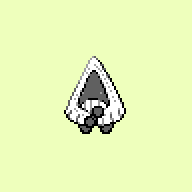

In [26]:
ph.showim(known_creatures[4], scale=2)

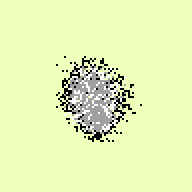

In [27]:
ph.showim(expected_vectors[4], scale=2)

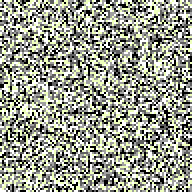

In [28]:
ph.showim(random_vectors[4], scale=2)

## Active Proportion

Active proportion is the proportion of cells that have a color quantum greater than 1.

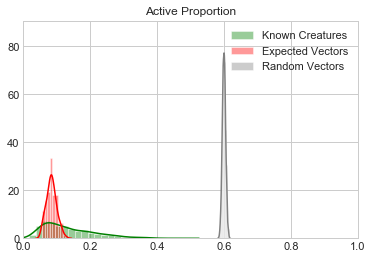

In [29]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.distplot(kc_aps, color="green", label="Known Creatures")
    sns.distplot(ev_aps, color="red", label="Expected Vectors")
    sns.distplot(rv_aps, color="gray", label="Random Vectors")
    plt.xlim(0, 1)
    plt.title("Active Proportion")
    plt.legend()

## Quantum Frequency

The frequency of each color quantum in the vector.

In [34]:
kc_qfreq = [ph.col_freq(xv) for xv in known_creatures]
ev_qfreq = [ph.col_freq(xv) for xv in expected_vectors]

In [35]:
kc_qdf = pd.DataFrame(kc_qfreq)
kc_qdf.head(3)

,0,1,2,3,4
0,0.893880,0.018446,0.044054,0.026693,0.016927
1,0.868707,0.017904,0.045681,0.049696,0.018012
2,0.755317,0.038194,0.120660,0.066840,0.018989


In [36]:
ev_qdf = pd.DataFrame(ev_qfreq)
ev_qdf.head(3)

,0,1,2,3,4
0,0.909505,0.022027,0.035156,0.0,0.033312
1,0.915907,0.019531,0.034288,0.0,0.030273
2,0.856120,0.036458,0.055990,0.0,0.051432


In [40]:
def plot_qfreq(kc_qdf, ev_qdf, qidx):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sns.distplot(kc_qdf[qidx], color="green", label="Known Creatures")
        sns.distplot(ev_qdf[qidx], color="red", label="Expected Vectors")    
        plt.xlim(0, 1)
        plt.title("Frequency of Q = {}".format(qidx))
        plt.legend()
        return plt

<module 'matplotlib.pyplot' from '/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

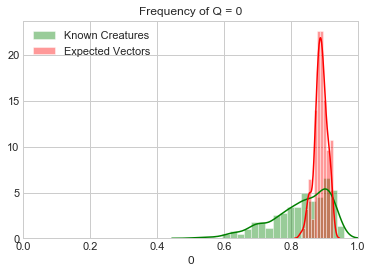

In [41]:
plot_qfreq(kc_qdf, ev_qdf, 0)

<module 'matplotlib.pyplot' from '/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

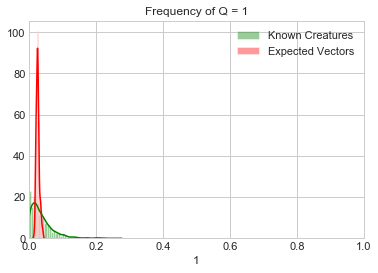

In [42]:
plot_qfreq(kc_qdf, ev_qdf, 1)

<module 'matplotlib.pyplot' from '/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

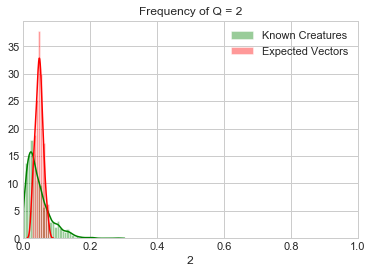

In [43]:
plot_qfreq(kc_qdf, ev_qdf, 2)

<module 'matplotlib.pyplot' from '/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

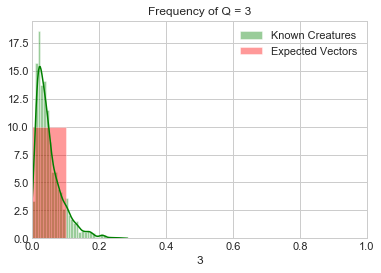

In [44]:
plot_qfreq(kc_qdf, ev_qdf, 3)

<module 'matplotlib.pyplot' from '/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

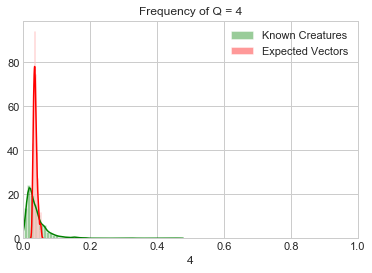

In [45]:
plot_qfreq(kc_qdf, ev_qdf, 4)